In [226]:
import pandas as pd
import os
from itables import show
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [227]:
#finding out how many cpu cores you have
!wmic cpu get NumberOfCores,NumberOfLogicalProcessors

#divide the work between the existing cores - 1
os.environ['OMP_NUM_THREADS']='7'

NumberOfCores  NumberOfLogicalProcessors  

4              8                          





# Prepare data set for prediction

In [228]:
traffic = pd.read_csv('traffic.csv')
weather = pd.read_csv('weather_data.csv')
emissions = pd.read_csv('emission_huegelstr.csv')

In [278]:
weather

,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],datetime
0,1004.0,61.0,11.5,2.6,235.0,2018-01-01 00:30:00
1,1004.0,62.7,11.0,2.7,244.0,2018-01-01 01:00:00
2,1004.0,64.0,10.7,2.0,229.0,2018-01-01 01:30:00
3,1004.0,65.5,10.4,2.1,235.0,2018-01-01 02:00:00
4,1005.0,65.0,10.2,2.6,243.0,2018-01-01 02:30:00
...,...,...,...,...,...,...
100143,1007.0,85.2,18.9,0.8,166.0,2023-09-18 08:00:00
100144,1007.0,81.6,19.4,0.9,157.0,2023-09-18 08:30:00
100145,1007.0,79.8,19.8,1.2,173.0,2023-09-18 09:00:00
100146,1007.0,76.4,20.4,1.2,176.0,2023-09-18 09:30:00


In [280]:
pred_data = traffic.merge(weather, how='left', left_on= 'roundedTimestamp', right_on='datetime').merge(emissions[['PM10','datetime']], how='left', left_on= 'roundedTimestamp', right_on='datetime' )
pred_data.drop(columns=['datetime_y', 'roundedTimestamp'], inplace = True)
show(pred_data)

df = pred_data.copy()

In [281]:
df.index = pd.to_datetime(df['datetime_x'], format='%Y-%m-%d %H:%M:%S')
df[:26]

,Bezeichnung,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,D62Z,D63Z,D64Z,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],datetime_x,PM10
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,A1,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,62.0,...,0.0,0.0,0.0,1012.0,78.8,20.2,0.5,70.0,2022-08-26 07:00:00,23.2
2022-08-26 07:30:00,A1,27.0,28.0,196.0,223.0,81.0,26.0,53.0,73.0,114.0,...,0.0,0.0,0.0,1012.0,77.9,20.4,0.4,55.0,2022-08-26 07:30:00,28.0
2022-08-26 08:00:00,A1,9.0,17.0,124.0,131.0,53.0,14.0,38.0,55.0,88.0,...,0.0,0.0,0.0,1012.0,75.1,21.2,0.6,35.0,2022-08-26 08:00:00,32.6
2022-08-29 07:00:00,A1,14.0,13.0,115.0,119.0,48.0,7.0,28.0,37.0,56.0,...,0.0,0.0,0.0,1019.0,79.4,13.0,1.2,40.0,2022-08-29 07:00:00,10.6
2022-08-29 07:30:00,A1,31.0,28.0,250.0,257.0,81.0,24.0,48.0,55.0,151.0,...,0.0,0.0,0.0,1019.0,76.7,13.9,1.2,43.0,2022-08-29 07:30:00,11.3
2022-08-29 08:00:00,A1,17.0,12.0,149.0,165.0,59.0,13.0,32.0,45.0,95.0,...,0.0,0.0,0.0,1019.0,73.4,15.0,1.1,54.0,2022-08-29 08:00:00,11.6
2022-09-01 07:00:00,A1,10.0,12.0,102.0,123.0,27.0,13.0,30.0,37.0,72.0,...,0.0,0.0,0.0,1018.0,83.5,13.6,0.5,46.0,2022-09-01 07:00:00,11.3
2022-09-01 07:30:00,A1,37.0,41.0,251.0,287.0,95.0,27.0,78.0,104.0,165.0,...,0.0,0.0,0.0,1018.0,81.3,14.5,0.6,56.0,2022-09-01 07:30:00,14.6
2022-09-01 08:00:00,A1,20.0,27.0,135.0,161.0,72.0,15.0,41.0,62.0,111.0,...,0.0,0.0,0.0,1018.0,76.9,15.7,1.0,40.0,2022-09-01 08:00:00,19.6


# Univariate Time Series Forecasting (LSTM)

<Axes: xlabel='datetime_x'>

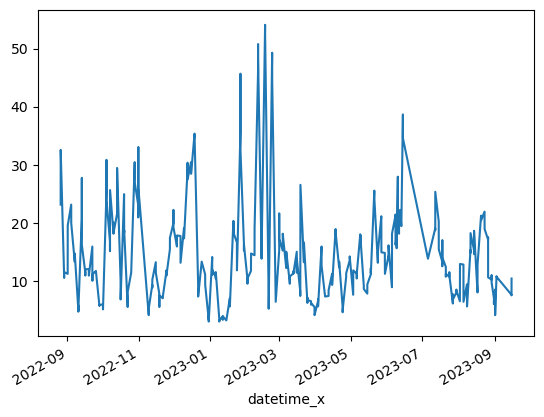

In [12]:
emissions = df['PM10']
emissions.plot()

In [13]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [14]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(emissions, WINDOW_SIZE)
X1.shape, y1.shape

((5827, 5, 1), (5827,))

In [15]:
X_train1, y_train1 = X1[:4000], y1[:4000]
X_val1, y_val1 = X1[4000:4800], y1[4000:4800]
X_test1, y_test1 = X1[4800:], y1[4800:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4000, 5, 1), (4000,), (800, 5, 1), (800,), (1027, 5, 1), (1027,))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [19]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [20]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
121/125 [============================>.] - ETA: 0s - loss: 256.1839 - root_mean_squared_error: 16.0057

125/125 [==============================] - 22s 141ms/step - loss: 254.6886 - root_mean_squared_error: 15.9590 - val_loss: 238.3633 - val_root_mean_squared_error: 15.4390
Epoch 2/10
116/125 [==========================>...] - ETA: 0s - loss: 196.2001 - root_mean_squared_error: 14.0071

125/125 [==============================] - 13s 105ms/step - loss: 193.2422 - root_mean_squared_error: 13.9012 - val_loss: 172.1383 - val_root_mean_squared_error: 13.1201
Epoch 3/10
116/125 [==========================>...] - ETA: 0s - loss: 135.1630 - root_mean_squared_error: 11.6260

125/125 [==============================] - 15s 124ms/step - loss: 134.1337 - root_mean_squared_error: 11.5816 - val_loss: 122.2984 - val_root_mean_squared_error: 11.0589
Epoch 4/10
124/125 [============================>.] - ETA: 0s - loss: 100.8133 - root_mean_squared_error: 10.0406

125/125 [==============================] - 18s 143ms/step - loss: 100.7765 - root_mean_squared_error: 10.0388 - val_loss: 99.8970 - val_root_mean_squared_error: 9.9948
Epoch 5/10
124/125 [============================>.] - ETA: 0s - loss: 86.5703 - root_mean_squared_error: 9.3043

125/125 [==============================] - 16s 126ms/step - loss: 86.8760 - root_mean_squared_error: 9.3207 - val_loss: 89.6850 - val_root_mean_squared_error: 9.4702
Epoch 6/10
124/125 [============================>.] - ETA: 0s - loss: 79.9897 - root_mean_squared_error: 8.9437

125/125 [==============================] - 20s 163ms/step - loss: 79.5814 - root_mean_squared_error: 8.9208 - val_loss: 82.6067 - val_root_mean_squared_error: 9.0888
Epoch 7/10
119/125 [===========================>..] - ETA: 0s - loss: 74.5821 - root_mean_squared_error: 8.6361

125/125 [==============================] - 17s 133ms/step - loss: 73.6681 - root_mean_squared_error: 8.5830 - val_loss: 75.9647 - val_root_mean_squared_error: 8.7158
Epoch 8/10
122/125 [============================>.] - ETA: 0s - loss: 68.3043 - root_mean_squared_error: 8.2646

125/125 [==============================] - 17s 138ms/step - loss: 67.8886 - root_mean_squared_error: 8.2395 - val_loss: 70.3923 - val_root_mean_squared_error: 8.3900
Epoch 9/10
122/125 [============================>.] - ETA: 0s - loss: 62.4827 - root_mean_squared_error: 7.9046

125/125 [==============================] - 17s 140ms/step - loss: 62.7549 - root_mean_squared_error: 7.9218 - val_loss: 64.8969 - val_root_mean_squared_error: 8.0559
Epoch 10/10
118/125 [===========================>..] - ETA: 0s - loss: 59.1280 - root_mean_squared_error: 7.6895

125/125 [==============================] - 22s 176ms/step - loss: 58.7959 - root_mean_squared_error: 7.6678 - val_loss: 61.1792 - val_root_mean_squared_error: 7.8217


In [21]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [22]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

125/125 [==============================] - 2s 6ms/step


,Train Predictions,Actuals
0,13.622010,11.6
1,12.852242,11.3
2,12.448582,14.6
3,14.167357,19.6
4,16.603041,23.2
...,...,...
3995,16.614370,17.7
3996,16.728550,17.9
3997,16.839226,17.8
3998,16.841763,13.4


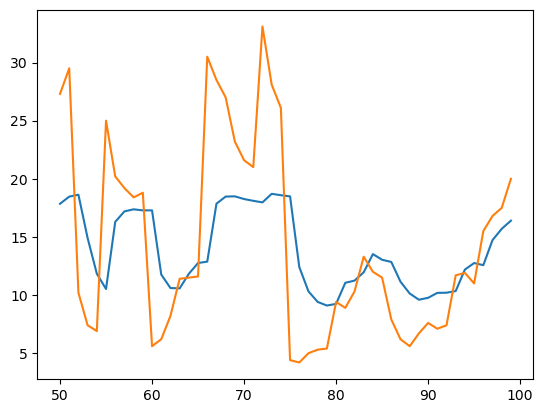

In [23]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [24]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

25/25 [==============================] - 0s 8ms/step


,Val Predictions,Actuals
0,14.263607,19.2
1,16.511623,17.4
2,16.495144,17.5
3,16.678539,29.1
4,18.428648,30.4
...,...,...
795,16.460543,16.3
796,16.187681,10.4
797,13.122576,9.6
798,12.028946,10.5


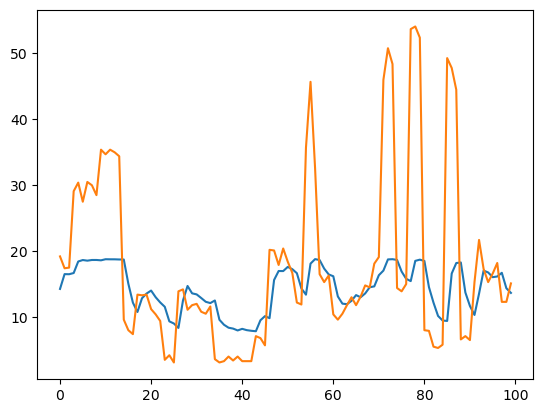

In [25]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [26]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

33/33 [==============================] - 1s 4ms/step


,Test Predictions,Actuals
0,12.458536,13.0
1,13.327362,11.8
2,12.998719,13.1
3,13.579942,14.8
4,14.517666,14.5
...,...,...
1022,11.349430,10.9
1023,11.990904,10.8
1024,12.349892,7.7
1025,11.161692,7.6


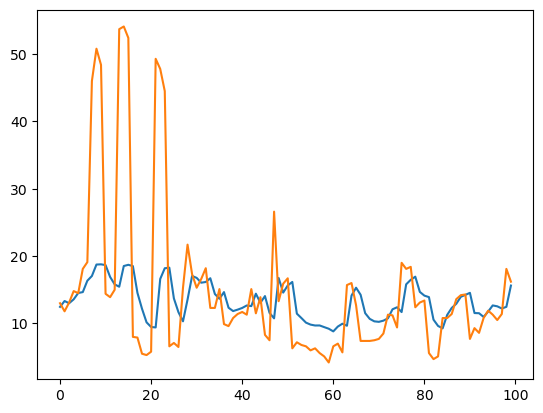

In [27]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

## Convolutional Neural Network

In [28]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 8)                 2056      
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [29]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [30]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
117/125 [===========================>..] - ETA: 0s - loss: 189.3554 - root_mean_squared_error: 13.7606

125/125 [==============================] - 5s 34ms/step - loss: 183.3951 - root_mean_squared_error: 13.5423 - val_loss: 91.6827 - val_root_mean_squared_error: 9.5751
Epoch 2/10
121/125 [============================>.] - ETA: 0s - loss: 75.1201 - root_mean_squared_error: 8.6672

125/125 [==============================] - 2s 17ms/step - loss: 74.9463 - root_mean_squared_error: 8.6572 - val_loss: 68.0379 - val_root_mean_squared_error: 8.2485
Epoch 3/10
118/125 [===========================>..] - ETA: 0s - loss: 59.0765 - root_mean_squared_error: 7.6861

125/125 [==============================] - 3s 24ms/step - loss: 59.4301 - root_mean_squared_error: 7.7091 - val_loss: 56.2023 - val_root_mean_squared_error: 7.4968
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 50.3884 - root_mean_squared_error: 7.0985

125/125 [==============================] - 3s 21ms/step - loss: 50.3884 - root_mean_squared_error: 7.0985 - val_loss: 49.1613 - val_root_mean_squared_error: 7.0115
Epoch 5/10
125/125 [==============================] - ETA: 0s - loss: 44.9420 - root_mean_squared_error: 6.7039

125/125 [==============================] - 3s 26ms/step - loss: 44.9420 - root_mean_squared_error: 6.7039 - val_loss: 45.0698 - val_root_mean_squared_error: 6.7134
Epoch 6/10
107/125 [========================>.....] - ETA: 0s - loss: 41.5436 - root_mean_squared_error: 6.4454

125/125 [==============================] - 3s 24ms/step - loss: 41.7826 - root_mean_squared_error: 6.4639 - val_loss: 43.0783 - val_root_mean_squared_error: 6.5634
Epoch 7/10
124/125 [============================>.] - ETA: 0s - loss: 40.0119 - root_mean_squared_error: 6.3255

125/125 [==============================] - 3s 24ms/step - loss: 40.0868 - root_mean_squared_error: 6.3314 - val_loss: 41.3868 - val_root_mean_squared_error: 6.4333
Epoch 8/10
111/125 [=========================>....] - ETA: 0s - loss: 37.5211 - root_mean_squared_error: 6.1254

125/125 [==============================] - 3s 20ms/step - loss: 39.0336 - root_mean_squared_error: 6.2477 - val_loss: 40.5175 - val_root_mean_squared_error: 6.3653
Epoch 9/10
114/125 [==========================>...] - ETA: 0s - loss: 39.0350 - root_mean_squared_error: 6.2478

125/125 [==============================] - 3s 26ms/step - loss: 38.3272 - root_mean_squared_error: 6.1909 - val_loss: 39.9356 - val_root_mean_squared_error: 6.3195
Epoch 10/10
122/125 [============================>.] - ETA: 0s - loss: 38.2703 - root_mean_squared_error: 6.1863

125/125 [==============================] - 3s 21ms/step - loss: 37.9420 - root_mean_squared_error: 6.1597 - val_loss: 39.5050 - val_root_mean_squared_error: 6.2853


## GRU (Gated Recurrent Unit)

In [31]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [32]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [33]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 281.2291 - root_mean_squared_error: 16.7699

125/125 [==============================] - 18s 118ms/step - loss: 281.2291 - root_mean_squared_error: 16.7699 - val_loss: 264.4203 - val_root_mean_squared_error: 16.2610
Epoch 2/10
122/125 [============================>.] - ETA: 0s - loss: 227.0378 - root_mean_squared_error: 15.0678

125/125 [==============================] - 12s 100ms/step - loss: 226.7217 - root_mean_squared_error: 15.0573 - val_loss: 214.4881 - val_root_mean_squared_error: 14.6454
Epoch 3/10
113/125 [==========================>...] - ETA: 0s - loss: 163.7390 - root_mean_squared_error: 12.7961

125/125 [==============================] - 11s 91ms/step - loss: 160.4006 - root_mean_squared_error: 12.6649 - val_loss: 140.1203 - val_root_mean_squared_error: 11.8372
Epoch 4/10
119/125 [===========================>..] - ETA: 0s - loss: 113.9864 - root_mean_squared_error: 10.6764

125/125 [==============================] - 11s 91ms/step - loss: 112.5770 - root_mean_squared_error: 10.6102 - val_loss: 108.2469 - val_root_mean_squared_error: 10.4042
Epoch 5/10
123/125 [============================>.] - ETA: 0s - loss: 90.7656 - root_mean_squared_error: 9.5271

125/125 [==============================] - 11s 92ms/step - loss: 90.7137 - root_mean_squared_error: 9.5244 - val_loss: 90.7175 - val_root_mean_squared_error: 9.5246
Epoch 6/10
117/125 [===========================>..] - ETA: 0s - loss: 78.6619 - root_mean_squared_error: 8.8692

125/125 [==============================] - 12s 95ms/step - loss: 77.6429 - root_mean_squared_error: 8.8115 - val_loss: 78.6238 - val_root_mean_squared_error: 8.8670
Epoch 7/10
123/125 [============================>.] - ETA: 0s - loss: 68.1311 - root_mean_squared_error: 8.2542

125/125 [==============================] - 13s 102ms/step - loss: 68.6744 - root_mean_squared_error: 8.2870 - val_loss: 70.5856 - val_root_mean_squared_error: 8.4015
Epoch 8/10
125/125 [==============================] - ETA: 0s - loss: 62.6466 - root_mean_squared_error: 7.9150

125/125 [==============================] - 13s 102ms/step - loss: 62.6466 - root_mean_squared_error: 7.9150 - val_loss: 65.0731 - val_root_mean_squared_error: 8.0668
Epoch 9/10
122/125 [============================>.] - ETA: 0s - loss: 58.8106 - root_mean_squared_error: 7.6688

125/125 [==============================] - 12s 96ms/step - loss: 58.4406 - root_mean_squared_error: 7.6446 - val_loss: 60.7980 - val_root_mean_squared_error: 7.7973
Epoch 10/10
111/125 [=========================>....] - ETA: 0s - loss: 54.2419 - root_mean_squared_error: 7.3649

125/125 [==============================] - 12s 95ms/step - loss: 54.9930 - root_mean_squared_error: 7.4157 - val_loss: 57.2446 - val_root_mean_squared_error: 7.5660


# Multivariate Time Series Forecasting (LSTM)

## Preprocessing

In [166]:
multi_df = pred_data.copy()
multi_df['Seconds'] = multi_df.index.map(pd.Timestamp.timestamp)
multi_df

,Bezeichnung,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,D63Z,D64Z,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],datetime_x,PM10,Seconds
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,A1,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,62.0,...,0.0,0.0,1012.0,78.8,20.2,0.5,70.0,2022-08-26 07:00:00,23.2,1.661497e+09
2022-08-26 07:30:00,A1,27.0,28.0,196.0,223.0,81.0,26.0,53.0,73.0,114.0,...,0.0,0.0,1012.0,77.9,20.4,0.4,55.0,2022-08-26 07:30:00,28.0,1.661499e+09
2022-08-26 08:00:00,A1,9.0,17.0,124.0,131.0,53.0,14.0,38.0,55.0,88.0,...,0.0,0.0,1012.0,75.1,21.2,0.6,35.0,2022-08-26 08:00:00,32.6,1.661501e+09
2022-08-29 07:00:00,A1,14.0,13.0,115.0,119.0,48.0,7.0,28.0,37.0,56.0,...,0.0,0.0,1019.0,79.4,13.0,1.2,40.0,2022-08-29 07:00:00,10.6,1.661756e+09
2022-08-29 07:30:00,A1,31.0,28.0,250.0,257.0,81.0,24.0,48.0,55.0,151.0,...,0.0,0.0,1019.0,76.7,13.9,1.2,43.0,2022-08-29 07:30:00,11.3,1.661758e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,A90,6.0,4.0,2.0,8.0,30.0,4.0,2.0,0.0,4.0,...,0.0,0.0,1016.0,96.6,12.7,NaN,NaN,2023-09-02 04:00:00,10.9,1.693627e+09
2023-09-02 04:30:00,A90,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1017.0,96.6,12.6,NaN,NaN,2023-09-02 04:30:00,10.8,1.693629e+09
2023-09-14 23:00:00,A90,1.0,6.0,1.0,11.0,22.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1019.0,94.6,11.0,NaN,NaN,2023-09-14 23:00:00,7.7,1.694732e+09


In [167]:
day = 60*60*24
year = 365.2425*day

multi_df['Day sin'] = np.sin(multi_df['Seconds'] * (2* np.pi / day))
multi_df['Day cos'] = np.cos(multi_df['Seconds'] * (2 * np.pi / day))
multi_df['Year sin'] = np.sin(multi_df['Seconds'] * (2 * np.pi / year))
multi_df['Year cos'] = np.cos(multi_df['Seconds'] * (2 * np.pi / year))
multi_df.head()


,Bezeichnung,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],datetime_x,PM10,Seconds,Day sin,Day cos,Year sin,Year cos
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,A1,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,62.0,...,20.2,0.5,70.0,2022-08-26 07:00:00,23.2,1.661497e+09,0.965926,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,A1,27.0,28.0,196.0,223.0,81.0,26.0,53.0,73.0,114.0,...,20.4,0.4,55.0,2022-08-26 07:30:00,28.0,1.661499e+09,0.923880,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,A1,9.0,17.0,124.0,131.0,53.0,14.0,38.0,55.0,88.0,...,21.2,0.6,35.0,2022-08-26 08:00:00,32.6,1.661501e+09,0.866025,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,A1,14.0,13.0,115.0,119.0,48.0,7.0,28.0,37.0,56.0,...,13.0,1.2,40.0,2022-08-29 07:00:00,10.6,1.661756e+09,0.965926,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,A1,31.0,28.0,250.0,257.0,81.0,24.0,48.0,55.0,151.0,...,13.9,1.2,43.0,2022-08-29 07:30:00,11.3,1.661758e+09,0.923880,-0.382683,-0.841016,-0.541010


In [168]:
#move target to be first column
column_to_move = multi_df.pop('PM10')
multi_df.insert(0, 'PM10', column_to_move)
multi_df

,PM10,Bezeichnung,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,...,Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],datetime_x,Seconds,Day sin,Day cos,Year sin,Year cos
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,23.2,A1,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,...,78.8,20.2,0.5,70.0,2022-08-26 07:00:00,1.661497e+09,9.659258e-01,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,28.0,A1,27.0,28.0,196.0,223.0,81.0,26.0,53.0,73.0,...,77.9,20.4,0.4,55.0,2022-08-26 07:30:00,1.661499e+09,9.238795e-01,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,32.6,A1,9.0,17.0,124.0,131.0,53.0,14.0,38.0,55.0,...,75.1,21.2,0.6,35.0,2022-08-26 08:00:00,1.661501e+09,8.660254e-01,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,10.6,A1,14.0,13.0,115.0,119.0,48.0,7.0,28.0,37.0,...,79.4,13.0,1.2,40.0,2022-08-29 07:00:00,1.661756e+09,9.659258e-01,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,11.3,A1,31.0,28.0,250.0,257.0,81.0,24.0,48.0,55.0,...,76.7,13.9,1.2,43.0,2022-08-29 07:30:00,1.661758e+09,9.238795e-01,-0.382683,-0.841016,-0.541010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,10.9,A90,6.0,4.0,2.0,8.0,30.0,4.0,2.0,0.0,...,96.6,12.7,NaN,NaN,2023-09-02 04:00:00,1.693627e+09,8.660254e-01,0.500000,-0.872985,-0.487747
2023-09-02 04:30:00,10.8,A90,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,...,96.6,12.6,NaN,NaN,2023-09-02 04:30:00,1.693629e+09,9.238795e-01,0.382683,-0.873160,-0.487434
2023-09-14 23:00:00,7.7,A90,1.0,6.0,1.0,11.0,22.0,0.0,0.0,0.0,...,94.6,11.0,NaN,NaN,2023-09-14 23:00:00,1.694732e+09,-2.588190e-01,0.965926,-0.958400,-0.285430


In [169]:
#drop unwanted columns
multi_df = multi_df.drop(columns = ['datetime_x', 'Seconds', 'Bezeichnung'])

In [212]:
multi_df = multi_df.fillna(multi_df.mean())

In [213]:
multi_df

,PM10,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,D64Z,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],Day sin,Day cos,Year sin,Year cos
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,23.2,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,62.0,...,0.0,1012.0,78.8,20.2,0.500000,70.000000,9.659258e-01,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,28.0,27.0,28.0,196.0,223.0,81.0,26.0,53.0,73.0,114.0,...,0.0,1012.0,77.9,20.4,0.400000,55.000000,9.238795e-01,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,32.6,9.0,17.0,124.0,131.0,53.0,14.0,38.0,55.0,88.0,...,0.0,1012.0,75.1,21.2,0.600000,35.000000,8.660254e-01,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,10.6,14.0,13.0,115.0,119.0,48.0,7.0,28.0,37.0,56.0,...,0.0,1019.0,79.4,13.0,1.200000,40.000000,9.659258e-01,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,11.3,31.0,28.0,250.0,257.0,81.0,24.0,48.0,55.0,151.0,...,0.0,1019.0,76.7,13.9,1.200000,43.000000,9.238795e-01,-0.382683,-0.841016,-0.541010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,10.9,6.0,4.0,2.0,8.0,30.0,4.0,2.0,0.0,4.0,...,0.0,1016.0,96.6,12.7,1.029168,137.837205,8.660254e-01,0.500000,-0.872985,-0.487747
2023-09-02 04:30:00,10.8,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,...,0.0,1017.0,96.6,12.6,1.029168,137.837205,9.238795e-01,0.382683,-0.873160,-0.487434
2023-09-14 23:00:00,7.7,1.0,6.0,1.0,11.0,22.0,0.0,0.0,0.0,0.0,...,0.0,1019.0,94.6,11.0,1.029168,137.837205,-2.588190e-01,0.965926,-0.958400,-0.285430


In [214]:
multi_df.describe()

,PM10,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,D64Z,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],Day sin,Day cos,Year sin,Year cos
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,...,5832.0,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5.832000e+03,5832.000000,5832.000000,5832.000000
mean,14.972634,52.732853,36.282407,47.338992,39.694444,34.271948,22.986626,30.895919,48.190844,33.505316,...,0.0,1015.297154,74.940724,11.149280,1.029168,137.837205,-2.732608e-01,0.010720,-0.029945,0.040462
std,9.071156,113.455532,29.690347,53.650426,48.672629,42.862666,23.589894,46.892412,242.214178,43.487331,...,0.0,8.128660,15.594675,5.816526,0.516061,83.965256,5.655471e-01,0.778157,0.726438,0.685511
min,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,985.000000,31.100000,-4.900000,0.400000,3.000000,-1.000000e+00,-1.000000,-0.999998,-0.998492
25%,8.700000,15.000000,16.000000,11.000000,9.000000,3.000000,7.000000,5.000000,3.000000,1.000000,...,0.0,1011.000000,63.700000,7.300000,0.600000,56.000000,-7.071068e-01,-0.793353,-0.784372,-0.591261
50%,12.900000,32.000000,30.000000,31.000000,25.000000,22.000000,17.000000,18.000000,22.000000,19.000000,...,0.0,1015.000000,75.900000,11.400000,1.000000,137.837205,-3.826834e-01,-0.130526,-0.073018,0.048718
75%,18.400000,64.000000,50.000000,65.000000,52.000000,50.000000,31.000000,42.000000,51.000000,49.000000,...,0.0,1020.000000,88.000000,15.300000,1.300000,227.000000,4.785941e-12,0.866025,0.685143,0.734070
max,54.100000,3036.000000,255.000000,626.000000,600.000000,776.000000,276.000000,1182.000000,13262.000000,432.000000,...,0.0,1037.000000,98.900000,24.300000,2.900000,345.000000,9.659258e-01,1.000000,0.999925,0.999777


In [156]:
#standardize

scaler = MinMaxScaler(feature_range=(-1, 1))

multi_df_scaled = scaler.fit_transform(multi_df)
multi_df = pd.DataFrame(multi_df_scaled, columns=multi_df.columns, index=multi_df.index)


In [157]:
multi_df

,PM10,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,D9Z,...,D64Z,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],Day sin,Day cos,Year sin,Year cos
datetime_x,,,,,,,,,,,,,,,,,,,,,
2022-08-26 07:00:00,-0.211765,-0.994730,-0.898039,-0.715655,-0.650000,-0.902062,-0.920290,-0.962775,-0.996682,-0.712963,...,-1.0,0.038462,0.407080,0.719178,-0.92,-0.608187,1.000000,-0.258819,-0.811774,-0.585114
2022-08-26 07:30:00,-0.023529,-0.982213,-0.780392,-0.373802,-0.256667,-0.791237,-0.811594,-0.910321,-0.988991,-0.472222,...,-1.0,0.038462,0.380531,0.732877,-1.00,-0.695906,0.957225,-0.382683,-0.811983,-0.584823
2022-08-26 08:00:00,0.156863,-0.994071,-0.866667,-0.603834,-0.563333,-0.863402,-0.898551,-0.935702,-0.991706,-0.592593,...,-1.0,0.038462,0.297935,0.787671,-0.84,-0.812865,0.898368,-0.500000,-0.812192,-0.584531
2022-08-29 07:00:00,-0.705882,-0.990777,-0.898039,-0.632588,-0.603333,-0.876289,-0.949275,-0.952623,-0.994420,-0.740741,...,-1.0,0.307692,0.424779,0.226027,-0.36,-0.783626,1.000000,-0.258819,-0.840818,-0.542423
2022-08-29 07:30:00,-0.678431,-0.979578,-0.780392,-0.201278,-0.143333,-0.791237,-0.826087,-0.918782,-0.991706,-0.300926,...,-1.0,0.307692,0.345133,0.287671,-0.36,-0.766082,0.957225,-0.382683,-0.841012,-0.542122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,-0.694118,-0.996047,-0.968627,-0.993610,-0.973333,-0.922680,-0.971014,-0.996616,-1.000000,-0.981481,...,-1.0,0.192308,0.932153,0.205479,NaN,NaN,0.898368,0.500000,-0.872983,-0.488812
2023-09-02 04:30:00,-0.698039,-1.000000,-1.000000,-1.000000,-1.000000,-0.958763,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,0.230769,0.932153,0.198630,NaN,NaN,0.957225,0.382683,-0.873157,-0.488499
2023-09-14 23:00:00,-0.819608,-0.999341,-0.952941,-0.996805,-0.963333,-0.943299,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,0.307692,0.873156,0.089041,NaN,NaN,-0.245973,0.965926,-0.958400,-0.286320


## create tensors

In [215]:
def df_to_X_y2(df, window_size=250):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    #define y
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [216]:
X2, y2 = df_to_X_y2(multi_df)
X2.shape, y2.shape

((5582, 250, 74), (5582,))

In [217]:
#split data
X2_train, y2_train = X2[:4000], y2[:4000]
X2_val, y2_val = X2[4000:4800], y2[4000:4800]
X2_test, y2_test = X2[4800:], y2[4800:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape


((4000, 250, 74), (4000,), (800, 250, 74), (800,), (782, 250, 74), (782,))

# create model & predict

In [202]:
#create model
from tensorflow.keras.backend import clear_session

clear_session()

model4 = Sequential()
model4.add(InputLayer((250, 74)))
model4.add(LSTM(165))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 165)               158400    
                                                                 
 dense (Dense)               (None, 8)                 1328      
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 159,737
Trainable params: 159,737
Non-trainable params: 0
_________________________________________________________________


In [207]:
from tensorflow.keras.metrics import MeanAbsoluteError

#set up checkpoint to save best model
cp4 = ModelCheckpoint('model4/', save_best_only=True)
#compile model 
model4.compile(loss=MeanAbsoluteError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [218]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.backend import clear_session

# Clear the Keras session
clear_session()

# Set up checkpoint to save the best model
cp4 = ModelCheckpoint('model4/', save_best_only=True)

# Create the model
model4 = Sequential()

# Input layer
model4.add(InputLayer((250, 74)))

model4.add(LSTM(256, return_sequences=True))
model4.add(Dropout(0.2))

# Decrease the number of neurons in Dense layers and add L1-Regularization
model4.add(Dense(64, activation='relu', kernel_regularizer=l1(0.001)))
model4.add(Dense(16, activation='relu', kernel_regularizer=l1(0.001)))


model4.add(Dense(1, activation='linear'))

model4.compile(loss='mean_absolute_error', optimizer=Adagrad(learning_rate=1), metrics=[RootMeanSquaredError()])

# Display model summary
model4.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 250, 256)          338944    
                                                                 
 dropout (Dropout)           (None, 250, 256)          0         
                                                                 
 dense (Dense)               (None, 250, 64)           16448     
                                                                 
 dense_1 (Dense)             (None, 250, 16)           1040      
                                                                 
 dense_2 (Dense)             (None, 250, 1)            17        
                                                                 
Total params: 356,449
Trainable params: 356,449
Non-trainable params: 0
_________________________________________________________________


In [219]:
#fit model
model4.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp4])

Epoch 1/10
125/125 [==============================] - ETA: 0s - loss: 17.8302 - root_mean_squared_error: 83.1610

125/125 [==============================] - 76s 564ms/step - loss: 17.8302 - root_mean_squared_error: 83.1610 - val_loss: 8.3382 - val_root_mean_squared_error: 9.3418
Epoch 2/10
125/125 [==============================] - ETA: 0s - loss: 8.0327 - root_mean_squared_error: 9.2577

125/125 [==============================] - 74s 596ms/step - loss: 8.0327 - root_mean_squared_error: 9.2577 - val_loss: 7.9461 - val_root_mean_squared_error: 9.3137
Epoch 3/10
125/125 [==============================] - ETA: 0s - loss: 7.7285 - root_mean_squared_error: 9.2647

125/125 [==============================] - 104s 836ms/step - loss: 7.7285 - root_mean_squared_error: 9.2647 - val_loss: 7.7178 - val_root_mean_squared_error: 9.2635
Epoch 4/10
125/125 [==============================] - ETA: 0s - loss: 7.5365 - root_mean_squared_error: 9.2436

125/125 [==============================] - 126s 1s/step - loss: 7.5365 - root_mean_squared_error: 9.2436 - val_loss: 7.5442 - val_root_mean_squared_error: 9.2770
Epoch 5/10
125/125 [==============================] - ETA: 0s - loss: 7.3701 - root_mean_squared_error: 9.2122

125/125 [==============================] - 129s 1s/step - loss: 7.3701 - root_mean_squared_error: 9.2122 - val_loss: 7.4208 - val_root_mean_squared_error: 9.5125
Epoch 6/10
125/125 [==============================] - ETA: 0s - loss: 7.2449 - root_mean_squared_error: 9.2738

125/125 [==============================] - 111s 890ms/step - loss: 7.2449 - root_mean_squared_error: 9.2738 - val_loss: 7.2776 - val_root_mean_squared_error: 9.3958
Epoch 7/10
125/125 [==============================] - ETA: 0s - loss: 7.1264 - root_mean_squared_error: 9.2569

125/125 [==============================] - 91s 733ms/step - loss: 7.1264 - root_mean_squared_error: 9.2569 - val_loss: 7.1652 - val_root_mean_squared_error: 9.3063
Epoch 8/10
125/125 [==============================] - ETA: 0s - loss: 7.0276 - root_mean_squared_error: 9.2303

125/125 [==============================] - 215s 2s/step - loss: 7.0276 - root_mean_squared_error: 9.2303 - val_loss: 7.0787 - val_root_mean_squared_error: 9.3842
Epoch 9/10
125/125 [==============================] - ETA: 0s - loss: 6.9435 - root_mean_squared_error: 9.2779

125/125 [==============================] - 134s 1s/step - loss: 6.9435 - root_mean_squared_error: 9.2779 - val_loss: 7.0014 - val_root_mean_squared_error: 9.2730
Epoch 10/10
125/125 [==============================] - ETA: 0s - loss: 6.8754 - root_mean_squared_error: 9.2301

125/125 [==============================] - 99s 792ms/step - loss: 6.8754 - root_mean_squared_error: 9.2301 - val_loss: 6.9423 - val_root_mean_squared_error: 9.3863


In [220]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [225]:
predictions = model4.predict(X2_test).flatten()
df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y2_test})
df

25/25 [==============================] - 3s 118ms/step


array([12.559116, 12.559116, 12.559116, ..., 12.559116, 12.559116,
       12.559116], dtype=float32)

In [221]:
plot_predictions1(model4, X2_test, y2_test)

25/25 [==============================] - 8s 260ms/step


ValueError: All arrays must be of the same length

25/25 [==============================] - 3s 95ms/step


(     Predictions  Actuals
 0       0.124199     16.3
 1       0.124199     11.5
 2       0.124199     11.0
 3       0.124199     12.1
 4       0.124199     12.1
 ..           ...      ...
 777     0.124199     10.9
 778     0.124199     10.8
 779     0.124199      7.7
 780     0.124199      7.6
 781     0.124199     10.5
 
 [782 rows x 2 columns],
 299.74972576195916)

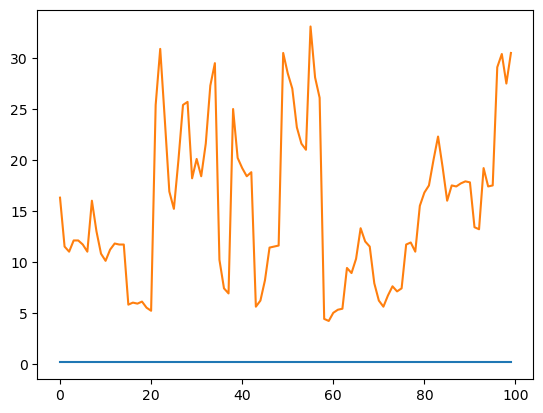

In [205]:
plot_predictions1(model4, X2_test, y2_test)

# Neural Network with just one column for traffic

In [329]:
traffic = pd.read_csv('traffic.csv')

In [331]:
traffic_gr= traffic.groupby(['roundedTimestamp', 'Bezeichnung']).sum()
traffic_gr = traffic_gr.reset_index()
traffic_gr

,roundedTimestamp,Bezeichnung,D1Z,D2Z,D3Z,D4Z,D5Z,D6Z,D7Z,D8Z,...,D55Z,D56Z,D57Z,D58Z,D59Z,D60Z,D61Z,D62Z,D63Z,D64Z
0,2022-08-26 07:00:00,A1,8.0,13.0,89.0,105.0,38.0,11.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-08-26 07:00:00,A10,45.0,41.0,21.0,3.0,44.0,23.0,36.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-08-26 07:00:00,A11,0.0,0.0,4.0,42.0,48.0,27.0,5.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-08-26 07:00:00,A111,27.0,24.0,35.0,4.0,3.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-08-26 07:00:00,A126,11.0,11.0,31.0,22.0,30.0,21.0,16.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5827,2023-09-15 00:00:00,A33,5.0,8.0,13.0,10.0,0.0,12.0,11.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5828,2023-09-15 00:00:00,A36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5829,2023-09-15 00:00:00,A69,11.0,10.0,9.0,10.0,0.0,5.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5830,2023-09-15 00:00:00,A8,7.0,4.0,5.0,18.0,21.0,16.0,7.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [332]:
sum_vehicles_list = []

for i, row in traffic_gr.iterrows():
    sum_vehicles = row[2:67].sum()
    sum_vehicles_list.append(sum_vehicles)

traffic_gr['SumVehicles'] = sum_vehicles_list

In [333]:
data = {'intersection' : traffic_gr['Bezeichnung'], 'timestamp' : traffic_gr['roundedTimestamp'], 'sum_vehicles': sum_vehicles_list}
traffic_sum = pd.DataFrame(data = data)
traffic_sum

,intersection,timestamp,sum_vehicles
0,A1,2022-08-26 07:00:00,521.0
1,A10,2022-08-26 07:00:00,313.0
2,A11,2022-08-26 07:00:00,159.0
3,A111,2022-08-26 07:00:00,100.0
4,A126,2022-08-26 07:00:00,272.0
...,...,...,...
5827,A33,2023-09-15 00:00:00,138.0
5828,A36,2023-09-15 00:00:00,66.0
5829,A69,2023-09-15 00:00:00,138.0
5830,A8,2023-09-15 00:00:00,228.0


In [334]:
traffic_sum_total = traffic_sum.groupby('timestamp')['sum_vehicles'].sum()
traffic_sum_total = pd.DataFrame(traffic_sum_total).reset_index()
traffic_sum_total

,timestamp,sum_vehicles
0,2022-08-26 07:00:00,5954.0
1,2022-08-26 07:30:00,15142.0
2,2022-08-26 08:00:00,9244.0
3,2022-08-29 07:00:00,6946.0
4,2022-08-29 07:30:00,15945.0
...,...,...
403,2023-09-02 04:00:00,16310.0
404,2023-09-02 04:30:00,3500.0
405,2023-09-14 23:00:00,4147.0
406,2023-09-14 23:30:00,9312.0


In [335]:
pred_data1 = traffic_sum_total.merge(weather, how='left', left_on= 'timestamp', right_on='datetime').merge(emissions[['PM10','datetime']], how='left', left_on= 'timestamp', right_on='datetime' )
pred_data1.drop(columns=['datetime_y', 'datetime_x'], inplace = True)
show(pred_data1)

df_sum = pred_data1.copy()

In [336]:
df_sum.index = pd.to_datetime(df_sum['timestamp'], format='%Y-%m-%d %H:%M:%S')
df_sum[:26]

,timestamp,sum_vehicles,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],PM10
timestamp,,,,,,,,
2022-08-26 07:00:00,2022-08-26 07:00:00,5954.0,1012.0,78.8,20.2,0.5,70.0,23.2
2022-08-26 07:30:00,2022-08-26 07:30:00,15142.0,1012.0,77.9,20.4,0.4,55.0,28.0
2022-08-26 08:00:00,2022-08-26 08:00:00,9244.0,1012.0,75.1,21.2,0.6,35.0,32.6
2022-08-29 07:00:00,2022-08-29 07:00:00,6946.0,1019.0,79.4,13.0,1.2,40.0,10.6
2022-08-29 07:30:00,2022-08-29 07:30:00,15945.0,1019.0,76.7,13.9,1.2,43.0,11.3
2022-08-29 08:00:00,2022-08-29 08:00:00,9492.0,1019.0,73.4,15.0,1.1,54.0,11.6
2022-09-01 07:00:00,2022-09-01 07:00:00,7680.0,1018.0,83.5,13.6,0.5,46.0,11.3
2022-09-01 07:30:00,2022-09-01 07:30:00,18098.0,1018.0,81.3,14.5,0.6,56.0,14.6
2022-09-01 08:00:00,2022-09-01 08:00:00,10115.0,1018.0,76.9,15.7,1.0,40.0,19.6


In [337]:
df_sum['Seconds'] = df_sum.index.map(pd.Timestamp.timestamp)
df_sum

,timestamp,sum_vehicles,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],PM10,Seconds
timestamp,,,,,,,,,
2022-08-26 07:00:00,2022-08-26 07:00:00,5954.0,1012.0,78.8,20.2,0.5,70.0,23.2,1.661497e+09
2022-08-26 07:30:00,2022-08-26 07:30:00,15142.0,1012.0,77.9,20.4,0.4,55.0,28.0,1.661499e+09
2022-08-26 08:00:00,2022-08-26 08:00:00,9244.0,1012.0,75.1,21.2,0.6,35.0,32.6,1.661501e+09
2022-08-29 07:00:00,2022-08-29 07:00:00,6946.0,1019.0,79.4,13.0,1.2,40.0,10.6,1.661756e+09
2022-08-29 07:30:00,2022-08-29 07:30:00,15945.0,1019.0,76.7,13.9,1.2,43.0,11.3,1.661758e+09
...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,2023-09-02 04:00:00,16310.0,1016.0,96.6,12.7,NaN,NaN,10.9,1.693627e+09
2023-09-02 04:30:00,2023-09-02 04:30:00,3500.0,1017.0,96.6,12.6,NaN,NaN,10.8,1.693629e+09
2023-09-14 23:00:00,2023-09-14 23:00:00,4147.0,1019.0,94.6,11.0,NaN,NaN,7.7,1.694732e+09


In [338]:
day = 60*60*24
year = 365.2425*day

df_sum['Day sin'] = np.sin(df_sum['Seconds'] * (2* np.pi / day))
df_sum['Day cos'] = np.cos(df_sum['Seconds'] * (2 * np.pi / day))
df_sum['Year sin'] = np.sin(df_sum['Seconds'] * (2 * np.pi / year))
df_sum['Year cos'] = np.cos(df_sum['Seconds'] * (2 * np.pi / year))
df_sum.head()


,timestamp,sum_vehicles,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],PM10,Seconds,Day sin,Day cos,Year sin,Year cos
timestamp,,,,,,,,,,,,,
2022-08-26 07:00:00,2022-08-26 07:00:00,5954.0,1012.0,78.8,20.2,0.5,70.0,23.2,1.661497e+09,0.965926,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,2022-08-26 07:30:00,15142.0,1012.0,77.9,20.4,0.4,55.0,28.0,1.661499e+09,0.923880,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,2022-08-26 08:00:00,9244.0,1012.0,75.1,21.2,0.6,35.0,32.6,1.661501e+09,0.866025,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,2022-08-29 07:00:00,6946.0,1019.0,79.4,13.0,1.2,40.0,10.6,1.661756e+09,0.965926,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,2022-08-29 07:30:00,15945.0,1019.0,76.7,13.9,1.2,43.0,11.3,1.661758e+09,0.923880,-0.382683,-0.841016,-0.541010


In [339]:
#move target to be first column
column_to_move = df_sum.pop('PM10')
df_sum.insert(0, 'PM10', column_to_move)
df_sum

,PM10,timestamp,sum_vehicles,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],Seconds,Day sin,Day cos,Year sin,Year cos
timestamp,,,,,,,,,,,,,
2022-08-26 07:00:00,23.2,2022-08-26 07:00:00,5954.0,1012.0,78.8,20.2,0.5,70.0,1.661497e+09,9.659258e-01,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,28.0,2022-08-26 07:30:00,15142.0,1012.0,77.9,20.4,0.4,55.0,1.661499e+09,9.238795e-01,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,32.6,2022-08-26 08:00:00,9244.0,1012.0,75.1,21.2,0.6,35.0,1.661501e+09,8.660254e-01,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,10.6,2022-08-29 07:00:00,6946.0,1019.0,79.4,13.0,1.2,40.0,1.661756e+09,9.659258e-01,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,11.3,2022-08-29 07:30:00,15945.0,1019.0,76.7,13.9,1.2,43.0,1.661758e+09,9.238795e-01,-0.382683,-0.841016,-0.541010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,10.9,2023-09-02 04:00:00,16310.0,1016.0,96.6,12.7,NaN,NaN,1.693627e+09,8.660254e-01,0.500000,-0.872985,-0.487747
2023-09-02 04:30:00,10.8,2023-09-02 04:30:00,3500.0,1017.0,96.6,12.6,NaN,NaN,1.693629e+09,9.238795e-01,0.382683,-0.873160,-0.487434
2023-09-14 23:00:00,7.7,2023-09-14 23:00:00,4147.0,1019.0,94.6,11.0,NaN,NaN,1.694732e+09,-2.588190e-01,0.965926,-0.958400,-0.285430


In [340]:
#drop unwanted columns
df_sum = df_sum.drop(columns = ['timestamp', 'Seconds'])

In [341]:
df_sum = df_sum.fillna(df_sum.mean())

In [342]:
df_sum

,PM10,sum_vehicles,Luftdruck[hPa],Relative Luftfeuchtigkeit[%],Temperatur[°C],Windgeschwindigkeit[m/s],Windrichtung[Grad],Day sin,Day cos,Year sin,Year cos
timestamp,,,,,,,,,,,
2022-08-26 07:00:00,23.2,5954.0,1012.0,78.8,20.2,0.50000,70.000000,9.659258e-01,-0.258819,-0.811779,-0.583965
2022-08-26 07:30:00,28.0,15142.0,1012.0,77.9,20.4,0.40000,55.000000,9.238795e-01,-0.382683,-0.811988,-0.583674
2022-08-26 08:00:00,32.6,9244.0,1012.0,75.1,21.2,0.60000,35.000000,8.660254e-01,-0.500000,-0.812197,-0.583383
2022-08-29 07:00:00,10.6,6946.0,1019.0,79.4,13.0,1.20000,40.000000,9.659258e-01,-0.258819,-0.840822,-0.541311
2022-08-29 07:30:00,11.3,15945.0,1019.0,76.7,13.9,1.20000,43.000000,9.238795e-01,-0.382683,-0.841016,-0.541010
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-02 04:00:00,10.9,16310.0,1016.0,96.6,12.7,1.01779,136.962264,8.660254e-01,0.500000,-0.872985,-0.487747
2023-09-02 04:30:00,10.8,3500.0,1017.0,96.6,12.6,1.01779,136.962264,9.238795e-01,0.382683,-0.873160,-0.487434
2023-09-14 23:00:00,7.7,4147.0,1019.0,94.6,11.0,1.01779,136.962264,-2.588190e-01,0.965926,-0.958400,-0.285430


In [343]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    #define y
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [392]:
X5, y5 = df_to_X_y2(df_sum)
X5.shape, y5.shape

((402, 6, 11), (402,))

In [393]:
#split data
X5_train, y5_train = X5[:300], y5[:300]
X5_val, y5_val = X5[300:350], y5[300:350]
X5_test, y5_test = X5[350:], y5[350:]
X5_train.shape, y5_train.shape, X5_val.shape, y5_val.shape, X5_test.shape, y5_test.shape


((300, 6, 11), (300,), (50, 6, 11), (50,), (52, 6, 11), (52,))

In [404]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import MeanAbsoluteError, RootMeanSquaredError
from tensorflow.keras.backend import clear_session

# Clear the Keras session
clear_session()

# Set up checkpoint to save the best model
cp5 = ModelCheckpoint('model5/', save_best_only=True)

# Create the model
model5 = Sequential()

# Input layer
model5.add(InputLayer((6,11)))

model5.add(LSTM(64))
model5.add(Dropout(0.2))

# Decrease the number of neurons in Dense layers and add L1-Regularization
model5.add(Dense(64, activation='relu'))#, kernel_regularizer=l1(0.001)))
model5.add(Dense(16, activation='relu'))#, kernel_regularizer=l1(0.001)))


model5.add(Dense(1, activation='linear'))

#model5.compile(loss='mean_absolute_error', optimizer=Adagrad(learning_rate=1), metrics=[RootMeanSquaredError()])
model5.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.001), metrics=['mean_squared_error'])

# Display model summary
model5.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                19456     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 24,673
Trainable params: 24,673
Non-trainable params: 0
_________________________________________________________________


In [405]:
#fit model
model5.fit(X5_train, y5_train, validation_data=(X5_val, y5_val), epochs=120, callbacks=[cp5])

Epoch 1/120
 1/10 [==>...........................] - ETA: 26s - loss: 13.8141 - mean_squared_error: 251.2244

10/10 [==============================] - 17s 2s/step - loss: 14.7773 - mean_squared_error: 310.9761 - val_loss: 17.5140 - val_mean_squared_error: 346.4324
Epoch 2/120
10/10 [==============================] - ETA: 0s - loss: 14.1335 - mean_squared_error: 292.5862

10/10 [==============================] - 12s 1s/step - loss: 14.1335 - mean_squared_error: 292.5862 - val_loss: 16.7995 - val_mean_squared_error: 321.7257
Epoch 3/120
 9/10 [==========================>...] - ETA: 0s - loss: 13.1986 - mean_squared_error: 267.8528

10/10 [==============================] - 12s 1s/step - loss: 13.2018 - mean_squared_error: 266.7721 - val_loss: 15.8518 - val_mean_squared_error: 290.3807
Epoch 4/120
 9/10 [==========================>...] - ETA: 0s - loss: 12.1292 - mean_squared_error: 240.6933

10/10 [==============================] - 12s 1s/step - loss: 11.9738 - mean_squared_error: 236.5097 - val_loss: 14.4272 - val_mean_squared_error: 247.4764
Epoch 5/120
 8/10 [=======================>......] - ETA: 0s - loss: 10.4947 - mean_squared_error: 196.5286

10/10 [==============================] - 12s 1s/step - loss: 10.3356 - mean_squared_error: 196.8185 - val_loss: 12.3516 - val_mean_squared_error: 191.6779
Epoch 6/120
10/10 [==============================] - ETA: 0s - loss: 8.4884 - mean_squared_error: 153.4076

10/10 [==============================] - 12s 1s/step - loss: 8.4884 - mean_squared_error: 153.4076 - val_loss: 9.6905 - val_mean_squared_error: 133.5905
Epoch 7/120
10/10 [==============================] - ETA: 0s - loss: 7.3172 - mean_squared_error: 120.3954 

10/10 [==============================] - 12s 1s/step - loss: 7.3172 - mean_squared_error: 120.3954 - val_loss: 7.1966 - val_mean_squared_error: 90.1394
Epoch 8/120
 9/10 [==========================>...] - ETA: 0s - loss: 6.9888 - mean_squared_error: 102.4968

10/10 [==============================] - 14s 2s/step - loss: 6.9996 - mean_squared_error: 105.2999 - val_loss: 5.8407 - val_mean_squared_error: 66.7443
Epoch 9/120
 1/10 [==>...........................] - ETA: 0s - loss: 4.8935 - mean_squared_error: 43.3964

10/10 [==============================] - 12s 1s/step - loss: 6.8954 - mean_squared_error: 95.4191 - val_loss: 5.7664 - val_mean_squared_error: 65.4430
Epoch 10/120
10/10 [==============================] - 0s 9ms/step - loss: 7.1553 - mean_squared_error: 105.2109 - val_loss: 6.1522 - val_mean_squared_error: 71.7155
Epoch 11/120
10/10 [==============================] - 0s 9ms/step - loss: 6.9518 - mean_squared_error: 101.1041 - val_loss: 6.4233 - val_mean_squared_error: 76.0942
Epoch 12/120
10/10 [==============================] - 0s 9ms/step - loss: 6.8395 - mean_squared_error: 104.6727 - val_loss: 6.5966 - val_mean_squared_error: 79.8858
Epoch 13/120
10/10 [==============================] - 0s 9ms/step - loss: 6.9962 - mean_squared_error: 104.4637 - val_loss: 6.2860 - val_mean_squared_error: 74.0862
Epoch 14/120
10/10 [==============================] - 0s 11ms/step - loss: 6.9399 - mean_squared_error: 103.7125 - val_loss: 6.3196 - val_mean_squared_error: 74.9861
Epoch 15/120
10/10 [===

10/10 [==============================] - 12s 1s/step - loss: 6.7954 - mean_squared_error: 102.8947 - val_loss: 5.6012 - val_mean_squared_error: 64.9422
Epoch 23/120
10/10 [==============================] - 0s 10ms/step - loss: 6.6934 - mean_squared_error: 96.6326 - val_loss: 5.6828 - val_mean_squared_error: 66.1633
Epoch 24/120
10/10 [==============================] - 0s 8ms/step - loss: 6.7226 - mean_squared_error: 102.0726 - val_loss: 6.2535 - val_mean_squared_error: 74.6572
Epoch 25/120
10/10 [==============================] - 0s 8ms/step - loss: 6.7427 - mean_squared_error: 104.1560 - val_loss: 6.3497 - val_mean_squared_error: 76.2617
Epoch 26/120
10/10 [==============================] - 0s 8ms/step - loss: 6.7606 - mean_squared_error: 102.2271 - val_loss: 6.0884 - val_mean_squared_error: 72.2649
Epoch 27/120
10/10 [==============================] - 0s 11ms/step - loss: 6.8730 - mean_squared_error: 102.6687 - val_loss: 5.7577 - val_mean_squared_error: 67.3780
Epoch 28/120
10/10 [==

10/10 [==============================] - 12s 1s/step - loss: 6.7885 - mean_squared_error: 102.6113 - val_loss: 5.5446 - val_mean_squared_error: 63.4991
Epoch 43/120
10/10 [==============================] - 0s 9ms/step - loss: 6.7221 - mean_squared_error: 103.1901 - val_loss: 6.1148 - val_mean_squared_error: 72.9309
Epoch 44/120
10/10 [==============================] - 0s 10ms/step - loss: 6.7326 - mean_squared_error: 102.5026 - val_loss: 6.1345 - val_mean_squared_error: 74.0296
Epoch 45/120
10/10 [==============================] - 0s 9ms/step - loss: 6.5908 - mean_squared_error: 100.2906 - val_loss: 6.1350 - val_mean_squared_error: 73.4018
Epoch 46/120
10/10 [==============================] - 0s 10ms/step - loss: 6.7556 - mean_squared_error: 102.2078 - val_loss: 5.7820 - val_mean_squared_error: 68.1150
Epoch 47/120
10/10 [==============================] - 0s 9ms/step - loss: 6.6876 - mean_squared_error: 97.2261 - val_loss: 5.8400 - val_mean_squared_error: 69.0691
Epoch 48/120
10/10 [==

10/10 [==============================] - 12s 1s/step - loss: 6.6198 - mean_squared_error: 98.0288 - val_loss: 5.5051 - val_mean_squared_error: 64.1745
Epoch 61/120
10/10 [==============================] - 0s 8ms/step - loss: 6.7120 - mean_squared_error: 99.2009 - val_loss: 6.0774 - val_mean_squared_error: 73.4997
Epoch 62/120
10/10 [==============================] - 0s 8ms/step - loss: 6.6718 - mean_squared_error: 102.2321 - val_loss: 6.0516 - val_mean_squared_error: 72.8973
Epoch 63/120
10/10 [==============================] - 0s 8ms/step - loss: 6.5175 - mean_squared_error: 98.3025 - val_loss: 5.7436 - val_mean_squared_error: 68.1887
Epoch 64/120
10/10 [==============================] - 0s 8ms/step - loss: 6.6352 - mean_squared_error: 97.1162 - val_loss: 5.7921 - val_mean_squared_error: 68.8385
Epoch 65/120
10/10 [==============================] - 0s 8ms/step - loss: 6.6354 - mean_squared_error: 98.1965 - val_loss: 6.1762 - val_mean_squared_error: 74.7158
Epoch 66/120
10/10 [========

In [406]:
from tensorflow.keras.models import load_model
model5 = load_model('model5/')

In [407]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions5(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

2/2 [==============================] - 1s 4ms/step


(    Predictions  Actuals
 0     12.456468     11.6
 1     12.453362     11.0
 2     14.599349      6.2
 3     13.307790      7.8
 4     13.307748      6.9
 5     13.307439      8.1
 6     13.305419      8.6
 7     13.176872      8.4
 8     12.446766      6.6
 9     12.446766      8.0
 10    12.446766      8.5
 11    12.446766      8.1
 12    12.446766     13.0
 13    14.568044     12.9
 14    13.128545     11.7
 15    12.694163      6.5
 16    13.724069      9.5
 17    14.098279      7.4
 18    13.149854      5.7
 19    14.563766     15.4
 20    14.033252     14.9
 21    14.027499     18.3
 22    14.810658     15.4
 23    14.758845     14.7
 24    13.509583     18.7
 25    16.037922      8.1
 26    13.498606      9.1
 27    13.459632     12.9
 28    12.936902     21.3
 29    12.717237     20.7
 30    12.717248     20.5
 31    12.895827     22.0
 32    14.792123     21.1
 33    13.848847     19.0
 34    15.518973     17.2
 35    13.115943     17.6
 36    13.111028     10.7
 37    14.00

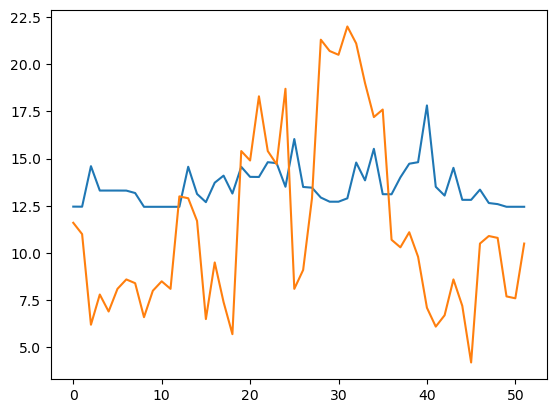

In [408]:
plot_predictions5(model5, X5_test, y5_test)